# `Breast Cancer Prediction`

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

from imblearn.pipeline import Pipeline


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import joblib

import warnings 
warnings.filterwarnings("ignore")

In [3]:
# google tends 
# importance of powerbi 
# why power bi is important for data analyis
# why clear and 

In [4]:
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
 
x1 = breast_cancer_wisconsin_original.data.features 
y1 = breast_cancer_wisconsin_original.data.targets 


In [5]:
breast_cancer_wisconsin_original

{'data': {'ids':      Sample_code_number
  0               1000025
  1               1002945
  2               1015425
  3               1016277
  4               1017023
  ..                  ...
  694              776715
  695              841769
  696              888820
  697              897471
  698              897471
  
  [699 rows x 1 columns],
  'features':      Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
  0                  5                        1                         1   
  1                  5                        4                         4   
  2                  3                        1                         1   
  3                  6                        8                         8   
  4                  4                        1                         1   
  ..               ...                      ...                       ...   
  694                3                        1                         1   
  695           

In [6]:
df=pd.concat([x1,y1],axis=1)
df.head(3)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2


In [7]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

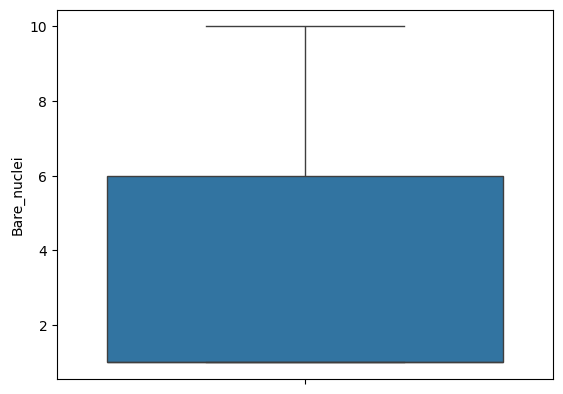

In [8]:
sns.boxplot(data=df,y="Bare_nuclei")
plt.show()

In [9]:
df.Bare_nuclei =df.Bare_nuclei.fillna(int(df.Bare_nuclei.mean()))
df.Bare_nuclei=df.Bare_nuclei.astype(int)

In [10]:
df.dtypes

Clump_thickness                int64
Uniformity_of_cell_size        int64
Uniformity_of_cell_shape       int64
Marginal_adhesion              int64
Single_epithelial_cell_size    int64
Bare_nuclei                    int64
Bland_chromatin                int64
Normal_nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [11]:
df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.532189,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.602774,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


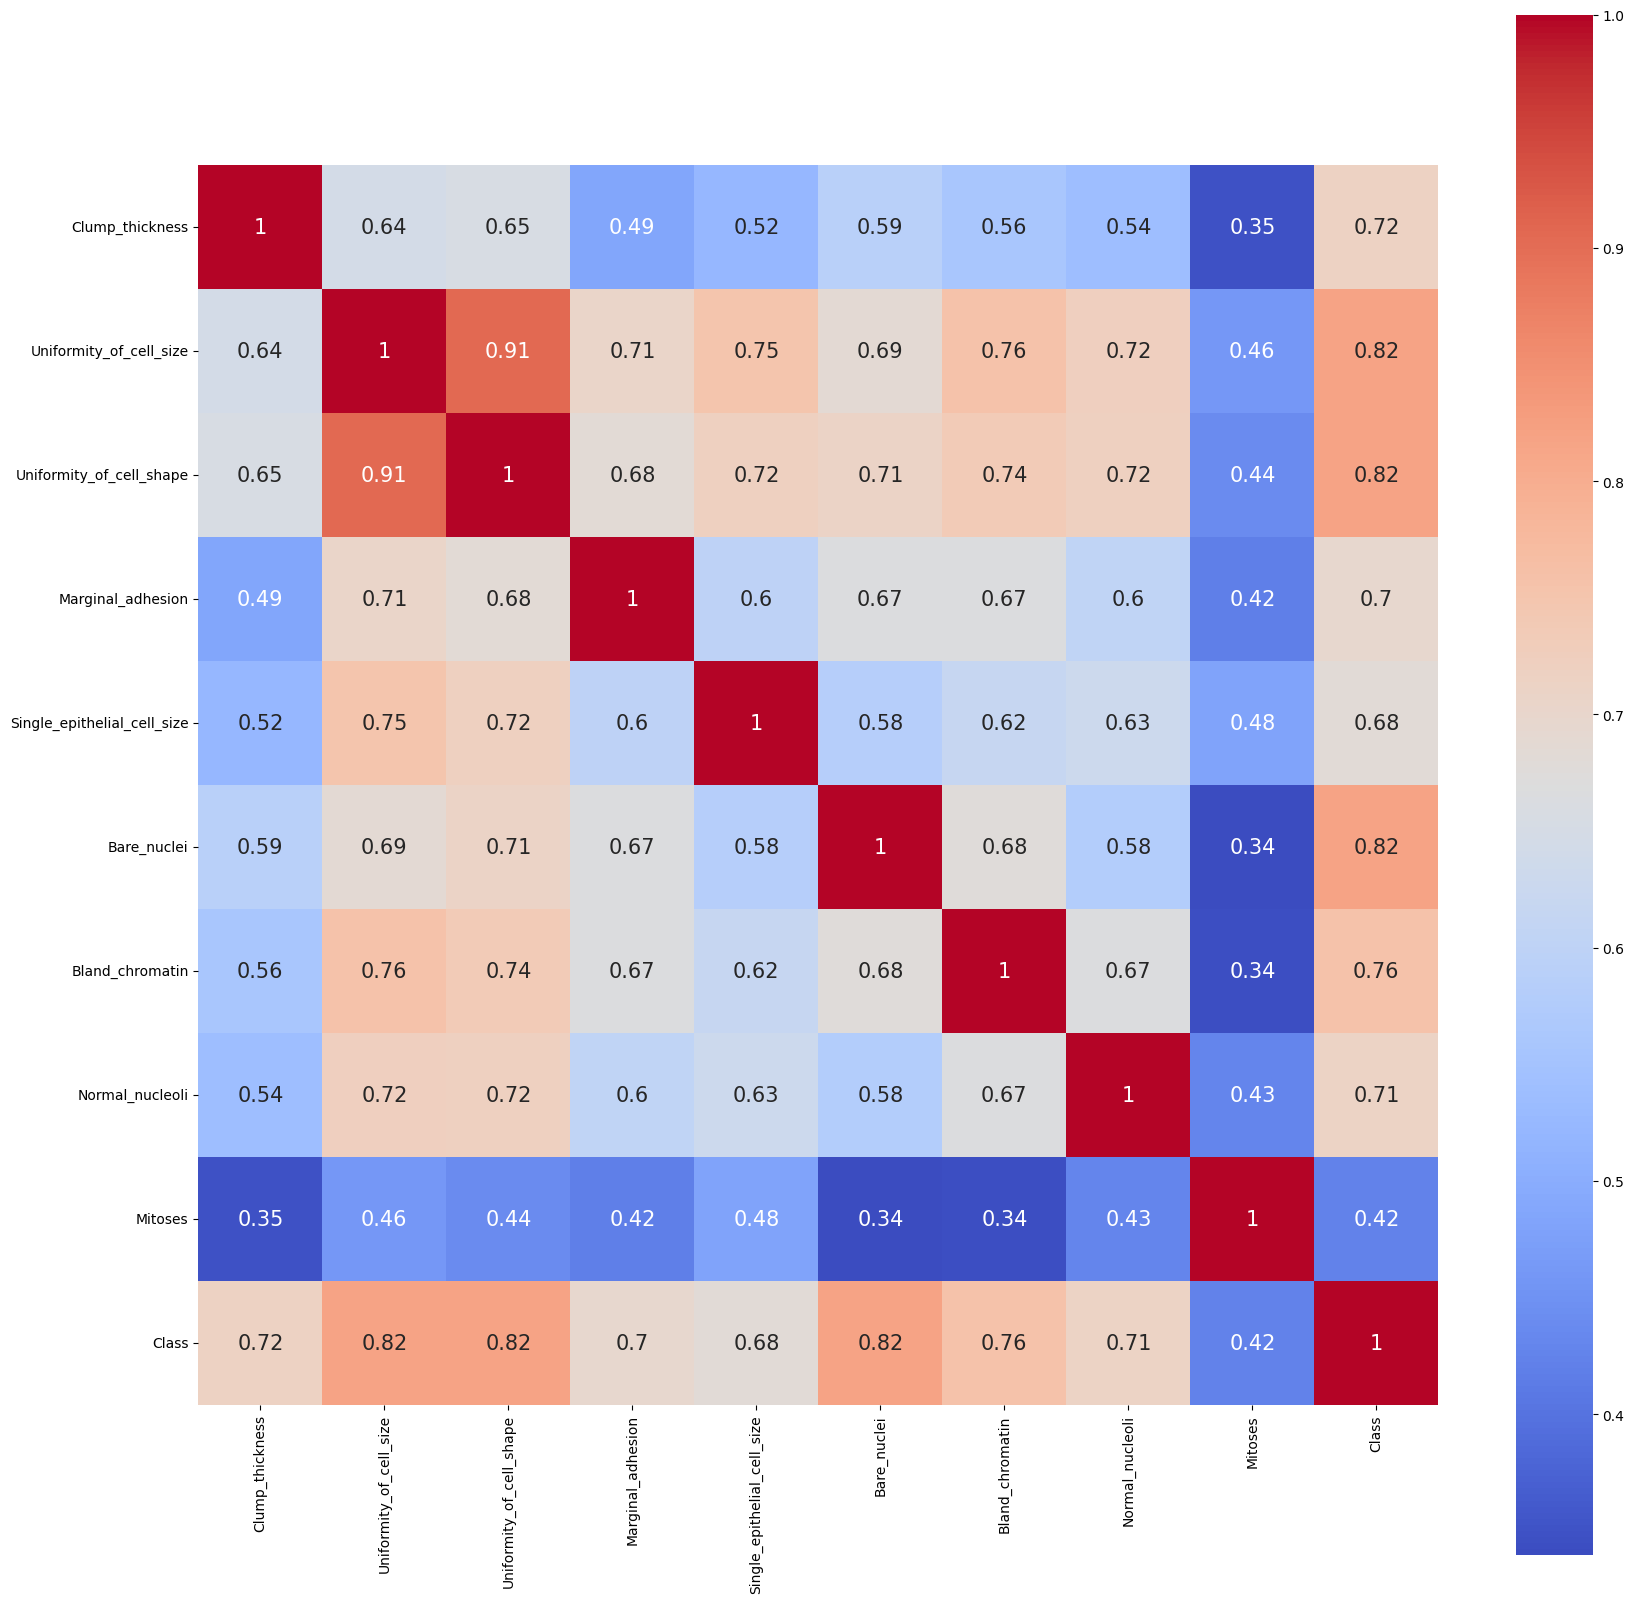

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,square=True,annot_kws={'size':15},cmap='coolwarm')
plt.show()

## **Train test Split, Balanced Data and standard Scaler**

In [13]:
x=df[["Clump_thickness",'Uniformity_of_cell_size','Uniformity_of_cell_shape','Bare_nuclei','Bland_chromatin','Normal_nucleoli']]
y=df['Class']

In [14]:
print(x.shape)
print(y.shape)

(699, 6)
(699,)


In [15]:
df.Class.value_counts(normalize=True)*100

Class
2    65.522175
4    34.477825
Name: proportion, dtype: float64

In above line one class is <40% so the data is imbalanced 
so SMOTE is required 

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## **Checking Different Models with Pipeline**

In [17]:
models = {
    "Logistic Regression(Ridge)":LogisticRegression(penalty='l2',solver='liblinear',random_state=42),
    "Logistic Regression(Lasso)":LogisticRegression(penalty='l1',solver='liblinear',random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "Naive Bayes":GaussianNB(),
    "SVC":SVC(probability=True),
    "KNeighbors":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42)
}

In [25]:
result = []
conf_matrices = {}

for name,model in models.items():
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('Classifier',model)])
    
    pipeline.fit(x_train,y_train)
    
    y_pred = pipeline.predict(x_test)
    y_pred_train = pipeline.predict(x_train)
    

    # Classification Metrics
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred, pos_label=4)
    recall = recall_score(y_test, y_pred, pos_label=4)
    f1 = f1_score(y_test, y_pred, pos_label=4)

    # Probability-based metrics
    y_prob = pipeline.predict_proba(x_test)[:,1]   # Positive class ki probability
    auc = roc_auc_score(y_test, y_prob)
    logloss = log_loss(y_test, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = cm

    result.append([name, acc_train, acc_test, precision, recall, f1, auc, logloss])

# Result ko DataFrame me daalo
result_df = pd.DataFrame(result, columns=["Model", "Acc_Train", "Acc_Test", "Precision", "Recall", "F1", "ROC_AUC", "LogLoss"])
print(result_df)

# Confusion matrices print karne ke liye
for model_name, cm in conf_matrices.items():
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")



                        Model  Acc_Train  Acc_Test  Precision    Recall  \
0  Logistic Regression(Ridge)   0.971370  0.966667   0.968750  0.925373   
1  Logistic Regression(Lasso)   0.971370  0.966667   0.968750  0.925373   
2               Random Forest   0.997955  0.976190   0.955882  0.970149   
3                 Naive Bayes   0.963190  0.971429   0.929577  0.985075   
4                         SVC   0.971370  0.976190   0.942857  0.985075   
5                  KNeighbors   0.971370  0.971429   0.942029  0.970149   
6      DecisionTreeClassifier   1.000000  0.942857   0.936508  0.880597   

         F1   ROC_AUC   LogLoss  
0  0.946565  0.996764  0.080376  
1  0.946565  0.996869  0.082255  
2  0.962963  0.994573  0.084554  
3  0.956522  0.993216  0.467850  
4  0.963504  0.993946  0.077580  
5  0.955882  0.996347  0.063622  
6  0.907692  0.933566  1.891302  

Confusion Matrix for Logistic Regression(Ridge):
[[141   2]
 [  5  62]]

Confusion Matrix for Logistic Regression(Lasso):
[[14

I chose Support Vector Classifier (SVC) because it ensures medical safety with only 1 false negative (Recall = 0.985), while keeping high Precision = 0.94 and the best F1 = 0.964. It balances accuracy and generalization, making it the safest and most reliable model for cancer detection.

## `Final Model`

In [27]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier',SVC(probability=True))
])

## **checking the model**

In [30]:
pipeline.fit(x_train,y_train)

print(pipeline.score(x_train,y_train))
print(pipeline.score(x_test,y_test),"\n")

print(accuracy_score(y_train, pipeline.predict(x_train)))
print(accuracy_score(y_test, pipeline.predict(x_test)))

0.9713701431492843
0.9761904761904762 

0.9713701431492843
0.9761904761904762


# `Prediction`

In [ ]:
# Clump_thickness	Uniformity_of_cell_size	Uniformity_of_cell_shape	Bare_nuclei	Bland_chromatin	Normal_nucleoli

In [ ]:

while True:
    try:
        clump_thickness = int(input("Clump Thickness (1-10): "))
        if 1 <= clump_thickness <= 10:
            break
        else:
            print("❌ Value must be between 1 and 10")
    except ValueError:
        print("❌ Please enter a valid number")

while True:
    try:
        uniformity_cell_size = int(input("Uniformity of Cell Size (1-10): "))
        if 1 <= uniformity_cell_size <= 10:
            break
        else:
            print("❌ Value must be between 1 and 10")
    except ValueError:
        print("❌ Please enter a valid number")

while True:
    try:
        uniformity_cell_shape = int(input("Uniformity of Cell Shape (1-10): "))
        if 1 <= uniformity_cell_shape <= 10:
            break
        else:
            print("❌ Value must be between 1 and 10")
    except ValueError:
        print("❌ Please enter a valid number")

while True:
    try:
        bare_nuclei = int(input("Bare Nuclei (1-10): "))
        if 1 <= bare_nuclei <= 10:
            break
        else:
            print("❌ Value must be between 1 and 10")
    except ValueError:
        print("❌ Please enter a valid number")


while True:
    try:
        bland_chromatin = int(input("Bland Chromatin (1-10): "))
        if 1 <= bland_chromatin <= 10:
            break
        else:
            print("❌ Value must be between 1 and 10")
    except ValueError:
        print("❌ Please enter a valid number")


while True:
    try:
        normal_nucleoli = int(input("Normal Nucleoli (1-10): "))
        if 1 <= normal_nucleoli <= 10:
            break
        else:
            print("❌ Value must be between 1 and 10")
    except ValueError:
        print("❌ Please enter a valid number")




pred = model.predict([[clump_thickness,
                      uniformity_cell_size,
                      uniformity_cell_shape,
                      bare_nuclei,
                      bland_chromatin,
                      normal_nucleoli]])

# Result print karo
if pred == 2:
    print("Prediction: Benign (Non-cancerous)")
else:
    print("Prediction: Malignant (Cancerous)")


❌ Value must be between 1 and 10
⚠️ Prediction: Malignant (Cancerous)


## `Save the Model`

In [34]:
joblib.dump(pipeline, 'breast_cancer_model.pkl')

['breast_cancer_model.pkl']